In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('../data/ready/UNI.csv',index_col='time').drop('Unnamed: 0', axis = 1).dropna()
df.shape

(8, 20)

In [4]:
df['met_threshold'].value_counts(normalize=True)

1.0    0.625
0.0    0.375
Name: met_threshold, dtype: float64

In [5]:
target = df['met_threshold']
features = df.drop(['met_threshold','lag_time'], axis=1)
scaler = StandardScaler()
features = scaler.fit_transform(features)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [6]:
met_threshold_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(features_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

met_threshold_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = met_threshold_model.fit(features_train, target_train, epochs=10, validation_data=(features_test, target_test))

Epoch 1/10
1/1 [==============================] - 1s 701ms/step - loss: 0.7649 - accuracy: 0.5000 - val_loss: 0.7805 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 27ms/step - loss: 0.7676 - accuracy: 0.3333 - val_loss: 0.7786 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 0.8123 - accuracy: 0.3333 - val_loss: 0.7788 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 23ms/step - loss: 0.8312 - accuracy: 0.3333 - val_loss: 0.7831 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 22ms/step - loss: 0.7923 - accuracy: 0.3333 - val_loss: 0.7867 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 23ms/step - loss: 0.7537 - accuracy: 0.5000 - val_loss: 0.7916 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 22ms/step - loss: 0.6990 - accuracy: 0.5000 - val_loss: 0.7963 - val_accuracy: 0.5000
Epoch 8/10
1/1 [==========

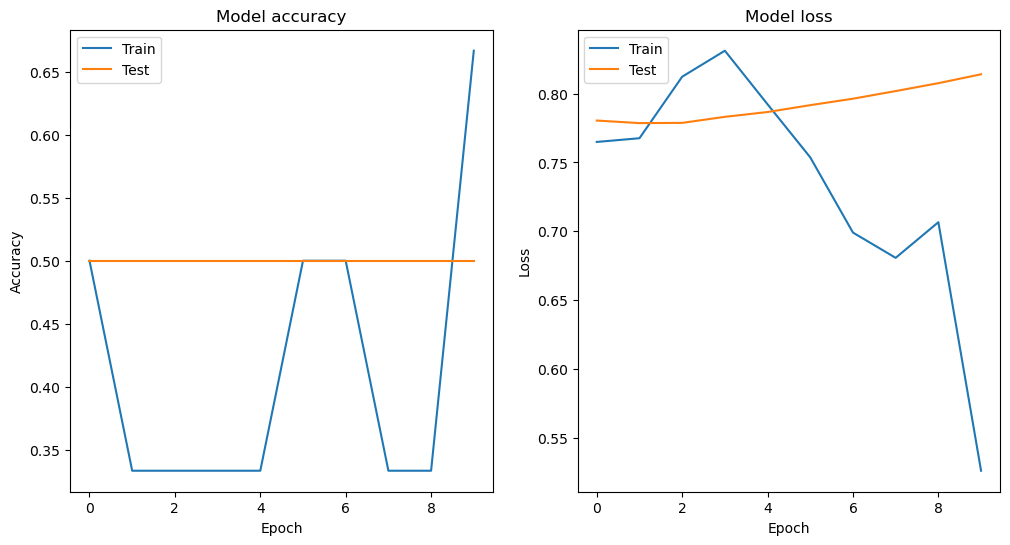

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [8]:
predictions = met_threshold_model.predict(features)
predicted_classes = (predictions >0.5).astype('int32')

1/1 [==============================] - 0s 65ms/step


Accuracy: 87.5%


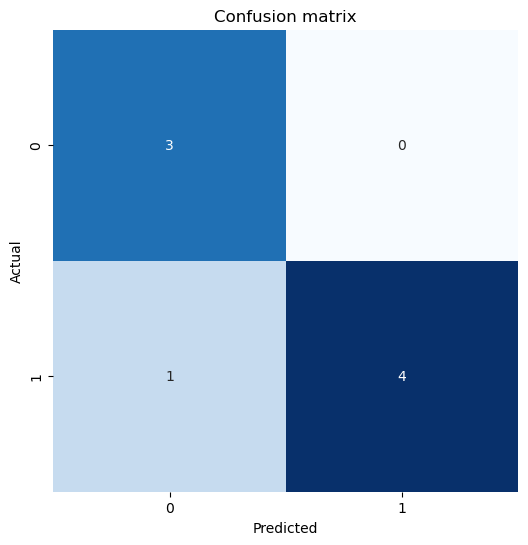

In [9]:
accuracy = accuracy_score(target, predicted_classes)
print(f"Accuracy: {accuracy * 100}%")

cm = confusion_matrix(target, predicted_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [10]:
df_predicted = df.copy()
df_predicted['met_threshold'] = predicted_classes
df_predicted['lag_time'] = pd.to_timedelta(df['lag_time']).dt.total_seconds() / 3600

In [11]:
features = df_predicted.drop('lag_time', axis=1)
target = df_predicted['lag_time']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [12]:
lag_model = Sequential([
    Dense(64, activation='relu', input_shape=(features_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1)
])

lag_model.compile(optimizer=Adam(0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lag_model.fit(features_train, target_train, 
                    epochs=100, 
                    validation_data=(features_test, target_test),
                    callbacks=[early_stop])

Epoch 1/100
1/1 [==============================] - 1s 536ms/step - loss: 5.9253 - val_loss: 9.2619
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 5.5614 - val_loss: 8.8275
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 5.4681 - val_loss: 8.4693
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 5.5709 - val_loss: 8.1776
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 4.5867 - val_loss: 7.8482
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 4.3778 - val_loss: 7.5483
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 4.1990 - val_loss: 7.3863
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 3.9488 - val_loss: 7.2341
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 3.2998 - val_loss: 7.0698
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 4.8021 - val_loss: 6.9239
Epoch 11/100
1/1 [

1/1 [==============================] - 0s 37ms/step


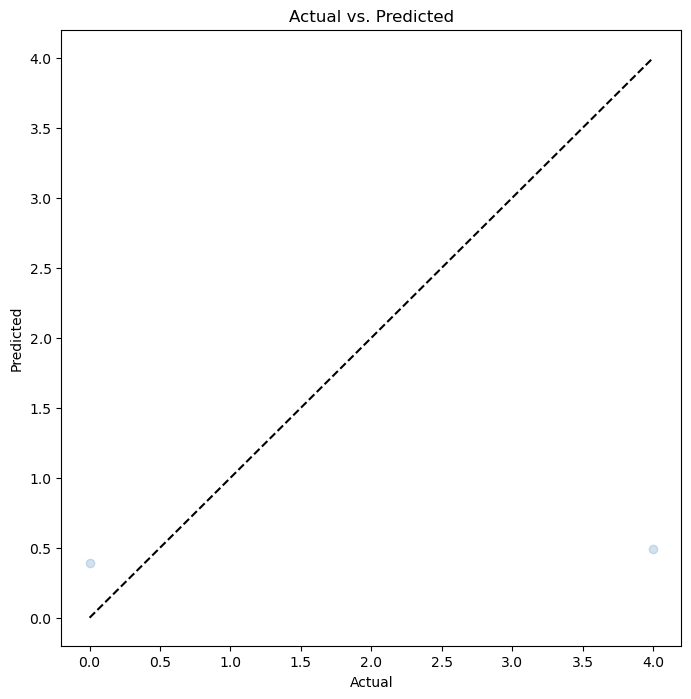

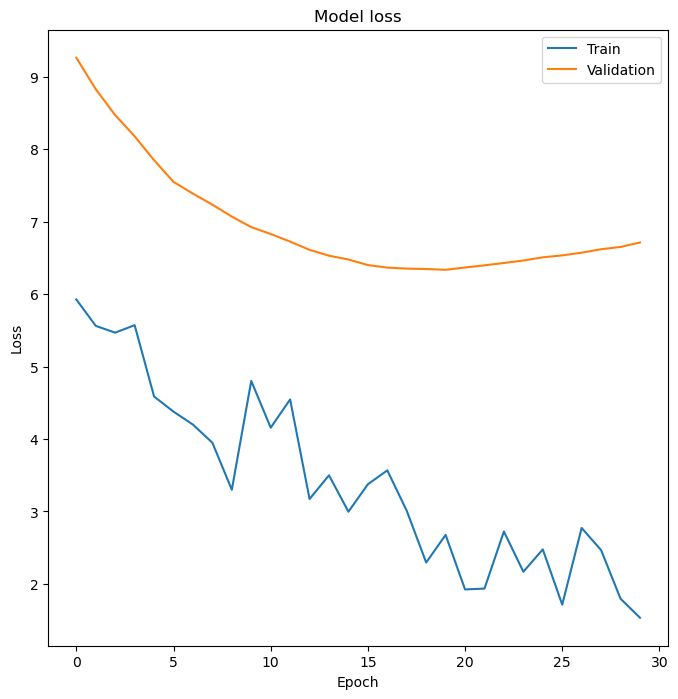

In [13]:
# Make predictions on the test set
predictions_test = lag_model.predict(features_test)

# Create a scatter plot of the actual versus predicted values
plt.figure(figsize=(8, 8))
plt.scatter(target_test, predictions_test, alpha=0.2)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Create a plot of the training and validation loss
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
features_scaled = scaler.transform(features)
predictions_all = lag_model.predict(features_scaled)
df_predicted['lag_time'] = np.around(predictions_all).flatten()
df_predicted.head()

1/1 [==============================] - 0s 15ms/step


,BTC_open,BTC_close,BTC_volume,UNI_open,UNI_close,UNI_volume,perc_BTC_change_1hr,perc_BTC_change_2hr,perc_BTC_change_3hr,perc_BTC_change_4hr,perc_BTC_change_5hr,perc_BTC_change_6hr,perc_UNI_change_1hr,perc_UNI_change_2hr,perc_UNI_change_3hr,perc_UNI_change_4hr,perc_UNI_change_5hr,perc_UNI_change_6hr,lag_time,met_threshold
time,,,,,,,,,,,,,,,,,,,,
2021-01-29 08:00:00,32323.72,36388.23,4.579055e+08,15.150,14.990,3503292.28,12.574388,11.828902,10.118670,9.862769,7.601011,6.820023,-1.056106,-0.530856,0.066756,0.604027,0.874832,-1.640420,0.0,0
2021-02-08 12:00:00,39459.41,43233.85,7.173601e+08,19.750,19.590,3650021.54,9.565374,9.559654,10.871974,10.242315,9.982707,10.710966,-0.810127,0.979381,3.486529,2.297650,1.660612,2.190923,0.0,0
2021-02-23 20:00:00,45507.19,47810.01,2.587453e+08,21.160,22.800,10966086.19,5.060343,2.056434,1.422008,1.080340,-1.632396,1.803114,7.750473,2.610261,0.484795,-1.298701,-3.878583,5.311778,1.0,1
2021-05-19 16:00:00,37451.48,39735.17,8.613382e+08,27.210,27.560,14783783.69,6.097730,5.710329,10.336180,14.969926,3.079451,0.957870,1.286292,7.824726,10.460922,38.631791,4.236006,-6.098807,1.0,1
2022-05-11 13:00:00,29453.96,31142.09,3.548136e+08,5.041,5.551,3112660.53,5.731419,-1.193060,-2.241606,-1.913009,-0.829802,1.858948,10.117040,-2.477161,-5.787508,-7.498750,-4.736571,-2.116029,1.0,0


In [15]:
df_predicted.to_csv('../data/predictions/UNI_predicted.csv')